In [1]:
%reload_kedro

2023-05-02 14:18:44,003 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-05-02 14:18:44,528 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-05-02 14:18:44,661 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-05-02 14:18:44,662 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs

/Users/gpalazzo/anaconda3/envs/msc/lib/python3.8/site-packages/quantstats/reports.py:37: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import (
/Users/gpalazzo/anaconda3/envs/msc/lib/python3.8/site-packages/quantstats/utils.py:297: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic("matplotlib inline")


## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-05-02 14:18:45,666 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

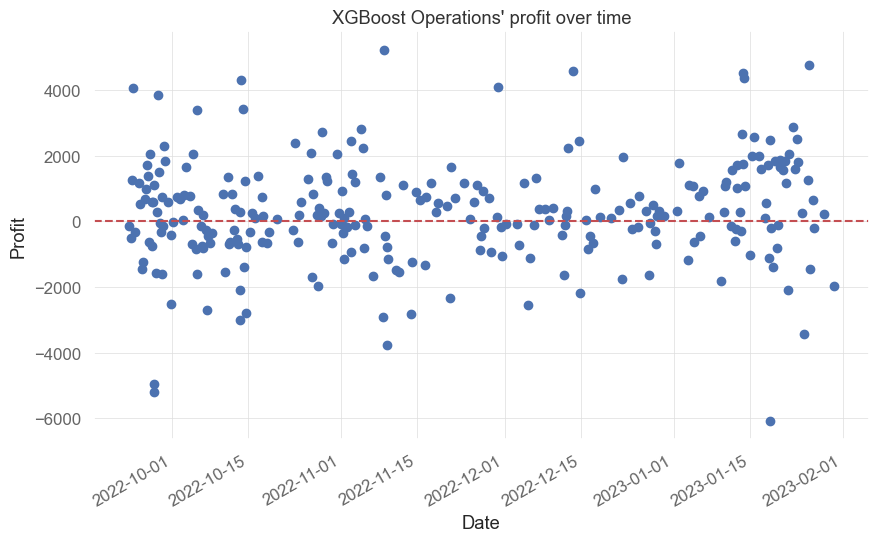

In [6]:
plot = df_ops[["close_time", "op_full_profit"]].set_index("close_time").sort_index(). \
                plot(title="XGBoost Operations' profit over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit",
                     linestyle="",
                     marker="o"
                    )

plt.axhline(y=0.0, color='r', linestyle='--')

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

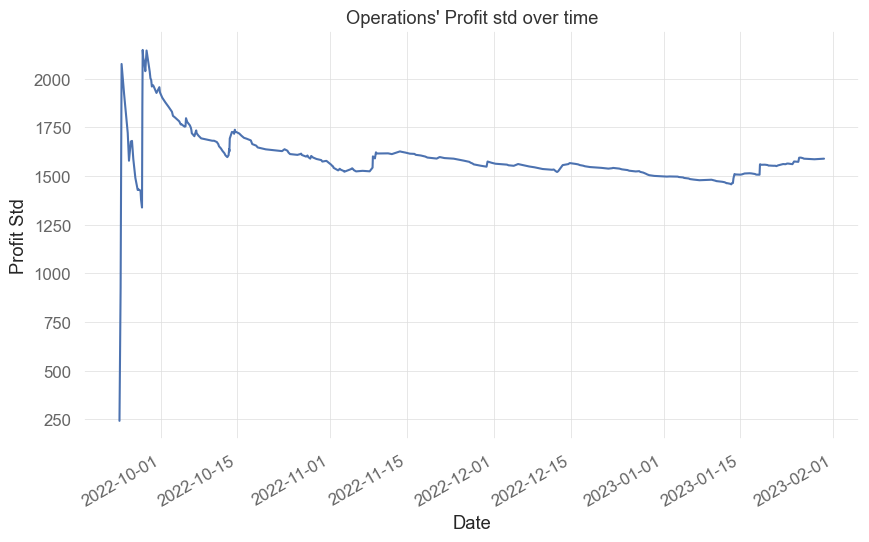

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

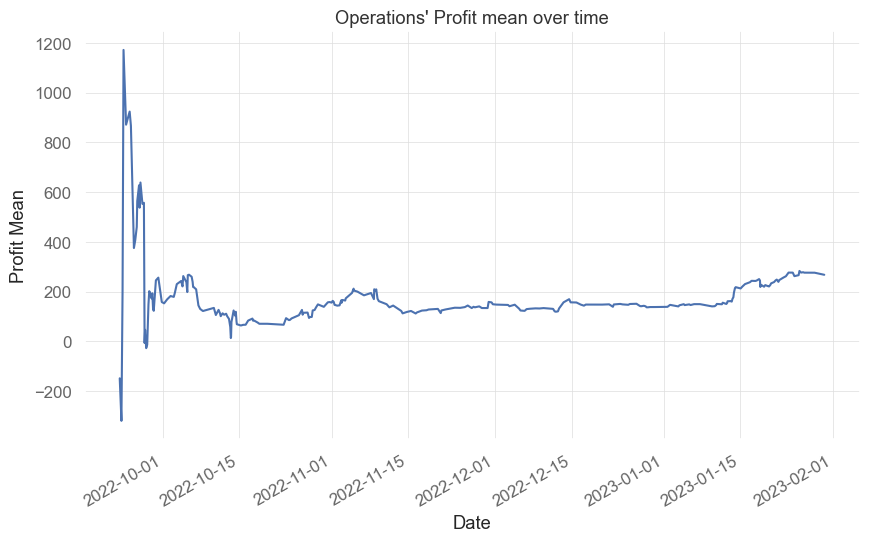

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-05-02 14:18:47,371 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

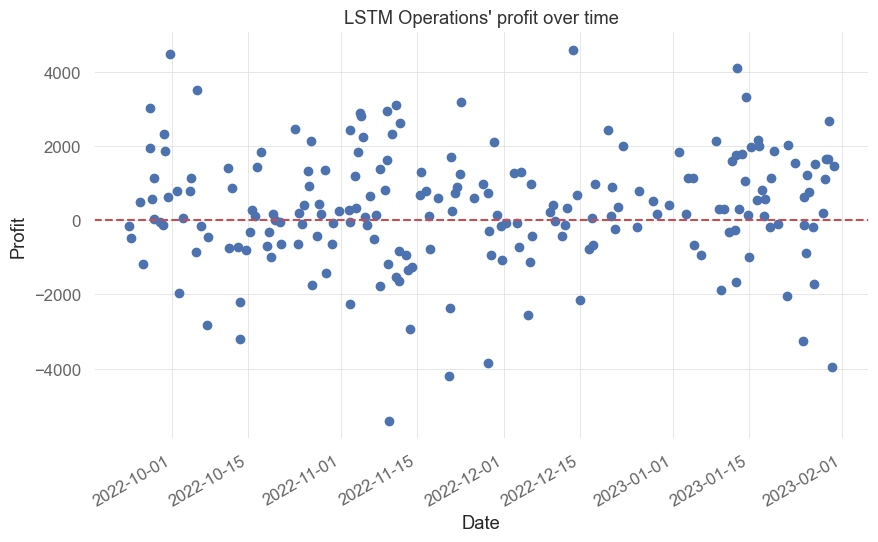

In [11]:
plot = df_ops[["close_time", "op_full_profit"]].set_index("close_time").sort_index(). \
                plot(title="LSTM Operations' profit over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit",
                     linestyle="",
                     marker="o"
                    )

plt.axhline(y=0.0, color='r', linestyle='--')

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

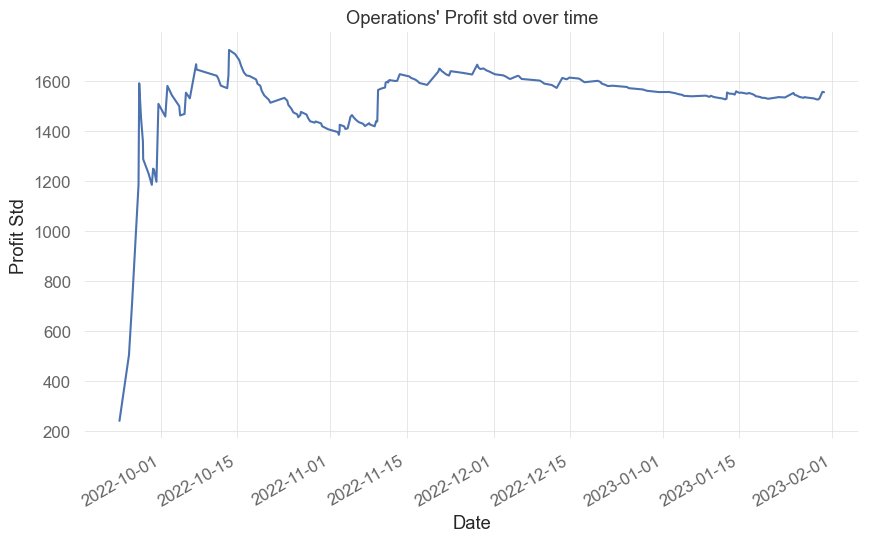

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

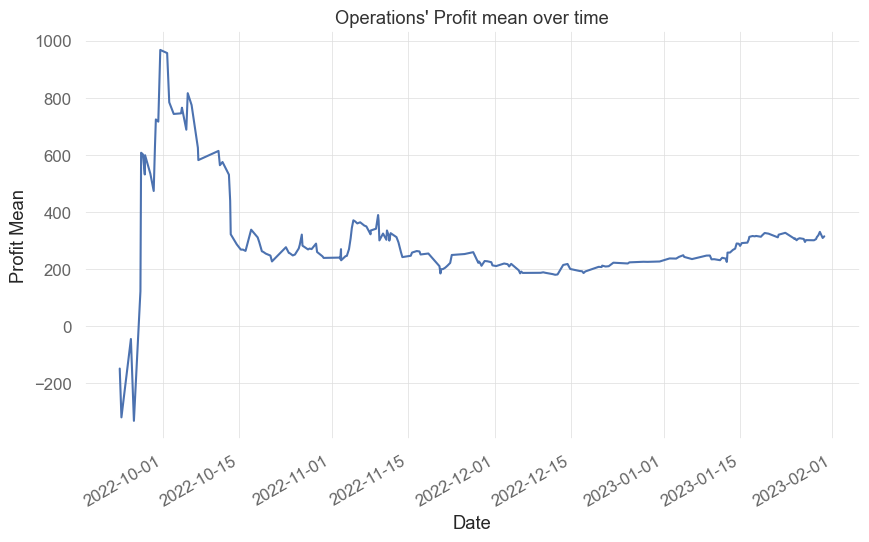

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-05-02 14:18:49,079 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

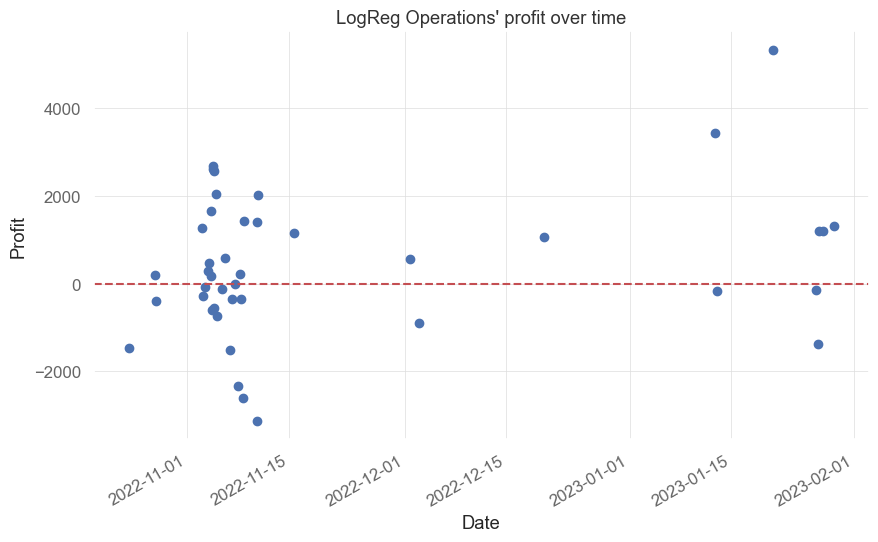

In [16]:
plot = df_ops[["close_time", "op_full_profit"]].set_index("close_time").sort_index(). \
                plot(title="LogReg Operations' profit over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit",
                     linestyle="",
                     marker="o"
                    )

plt.axhline(y=0.0, color='r', linestyle='--')

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

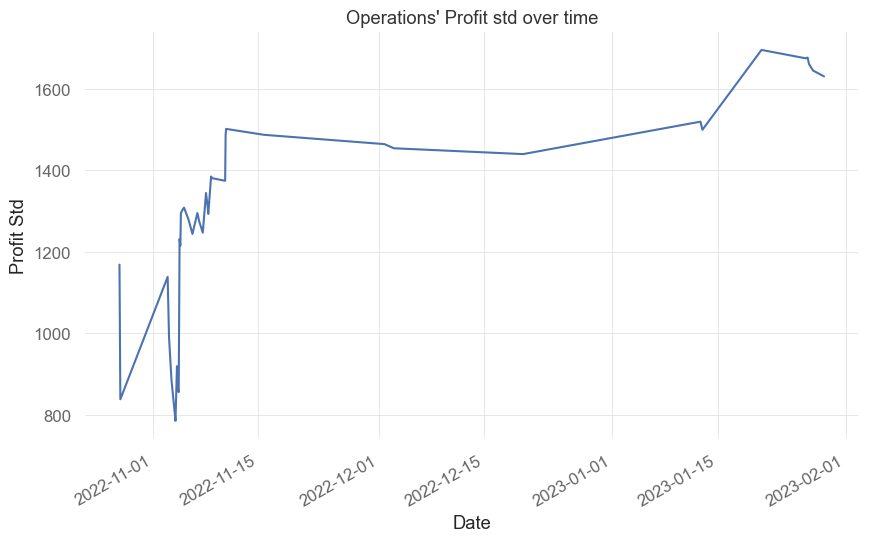

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

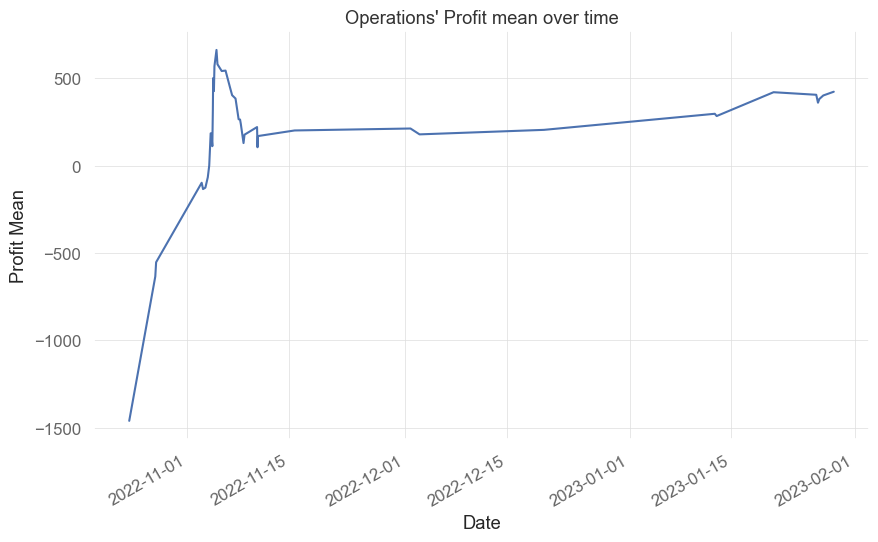

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## XGBoost

### Portfolio overall metrics - Part 1

In [19]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-05-02 14:18:50,391 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,72190.554857,7,5,xgboost


### Portfolio overall metrics - Part 2

In [20]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-02 14:18:50,406 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [21]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   48.13%
CAGR﹪              203.95%

Sharpe              3.1
Prob. Sharpe Ratio  99.6%
Sortino             4.95
Sortino/√2          3.5
Omega               1.57

Max Drawdown        -7.34%
Longest DD Days     34

Gain/Pain Ratio     1.1
Gain/Pain (1M)      -

Payoff Ratio        1.16
Profit Factor       1.57
Common Sense Ratio  1.85
CPC Index           1.05
Tail Ratio          1.18
Outlier Win Ratio   3.69
Outlier Loss Ratio  3.83

MTD                 24.46%
3M                  34.96%
6M                  48.13%
YTD                 24.46%
1Y                  48.13%
3Y (ann.)           203.95%
5Y (ann.)           203.95%
10Y (ann.)          203.95%
All-time (ann.)     203.95%

Avg. Drawdown       -1.46%
Avg. Drawdown Days  3
Recovery Factor     6.56
Ulcer Index         0.03
Serenity Index      3.49

In [22]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_xgboost_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LSTM

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-05-02 14:18:50,861 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,63502.459043,8,5,lstm


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-02 14:18:50,874 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   42.34%
CAGR﹪              171.51%

Sharpe              3.85
Prob. Sharpe Ratio  99.75%
Sortino             6.18
Sortino/√2          4.37
Omega               1.73

Max Drawdown        -7.1%
Longest DD Days     43

Gain/Pain Ratio     1.19
Gain/Pain (1M)      -

Payoff Ratio        1.13
Profit Factor       1.73
Common Sense Ratio  2.09
CPC Index           1.18
Tail Ratio          1.21
Outlier Win Ratio   3.1
Outlier Loss Ratio  3.48

MTD                 16.08%
3M                  29.86%
6M                  42.34%
YTD                 16.08%
1Y                  42.34%
3Y (ann.)           171.51%
5Y (ann.)           171.51%
10Y (ann.)          171.51%
All-time (ann.)     171.51%

Avg. Drawdown       -1.47%
Avg. Drawdown Days  6
Recovery Factor     5.96
Ulcer Index         0.03
Serenity Index      3.

In [26]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_lstm_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LogReg

### Portfolio overall metrics - Part 1

In [27]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-05-02 14:18:51,239 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,17761.547601,4,4,LogReg


### Portfolio overall metrics - Part 2

In [28]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-02 14:18:51,256 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [29]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-10-23
End Period          2023-01-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   11.84%
CAGR﹪              52.36%

Sharpe              4.97
Prob. Sharpe Ratio  96.13%
Sortino             9.43
Sortino/√2          6.67
Omega               2.05

Max Drawdown        -4.7%
Longest DD Days     76

Gain/Pain Ratio     1.98
Gain/Pain (1M)      10.32

Payoff Ratio        1.69
Profit Factor       2.05
Common Sense Ratio  2.46
CPC Index           1.9
Tail Ratio          1.2
Outlier Win Ratio   2.94
Outlier Loss Ratio  3.26

MTD                 6.89%
3M                  13.09%
6M                  11.84%
YTD                 6.89%
1Y                  11.84%
3Y (ann.)           52.36%
5Y (ann.)           52.36%
10Y (ann.)          52.36%
All-time (ann.)     52.36%

Avg. Drawdown       -1.14%
Avg. Drawdown Days  14
Recovery Factor     2.52
Ulcer Index         0.02
Serenity Index      2.01


In [30]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_logreg_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'